<a href="https://colab.research.google.com/github/juancuadrado/DOE_2023/blob/main/Caso_p%C3%A9rdida_nitrogeno_C_DOE_DCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit &> /dev/null
from bioinfokit.analys import stat as st
!pip install pingouin &> /dev/null
import pingouin as pg

#  **Tema 1: Diseños Completos Aleatorizados - DCA usando Python: Versión 2**</span>

### <span style="color:blue"> **Problema: _Problema 1: Se realizó una investigación para determinar la pérdida de nitrógeno por transpiración con varios niveles dietéticos de proteínas. En el experimento se utilizaron 16 hombres preadolescentes a quienes se les juzgó estar saludables. Cada muchacho estuvo sujeto a una de las cuatro dietas controladas en las cuales consumía 20, 45, 60 u 85 gramos de proteínas por día. Los siguientes datos representan la pérdida de nitrógeno del cuerpo a través de la transpiración, en miligramos, recabados durante los dos días últimos del periodo de experimentación_:**</span>

### <span style="color:blue">**Tabla de datos**</span>


|Gramos de Proteína por día||Pérdidas de nitrógeno del cuerpo por transpiración|||
|:--:|:--:|:--:|:--:|:--:|
|A = 20 g|190|180|200|210|
|B = 45 g|210|240|250|235|
|C = 60 g|318|295|270|380|
|D = 85 g|390|321|396|399|


## **1.3 Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**

In [43]:
## **1.3 Los datos en Python y definimos el DataFrame: Ingresamos los datos como columnas**
datos = [[190, 210, 318, 390],
         [180, 240, 295, 321],
         [200, 250, 270, 396],
         [210, 235, 380, 399]]

columnas = ['A', 'B', 'C', 'D'] # definimos los nombres de las columnas
filas = ['F1', 'F2', 'F3', 'F4'] # definimos los nombres de las filas

df = pd.DataFrame(datos, columns=columnas, index=filas)
df.T

,F1,F2,F3,F4
A,190,180,200,210
B,210,240,250,235
C,318,295,270,380
D,390,321,396,399


## **1.4 Verificando que los datos coinciden con la tabla**

In [44]:
## **1.4 Verificando que los datos coinciden con la tabla**
print(df)

      A    B    C    D
F1  190  210  318  390
F2  180  240  295  321
F3  200  250  270  396
F4  210  235  380  399


In [45]:
df.describe()

,A,B,C,D
count,4.000000,4.000000,4.000000,4.000000
mean,195.000000,233.750000,315.750000,376.500000
std,12.909944,17.017148,47.105378,37.188708
min,180.000000,210.000000,270.000000,321.000000
25%,187.500000,228.750000,288.750000,372.750000
50%,195.000000,237.500000,306.500000,393.000000
75%,202.500000,242.500000,333.500000,396.750000
max,210.000000,250.000000,380.000000,399.000000


# **1.5 Organizando adecuadamente la Tabla**

In [46]:
# **1.5 Organizando adecuadamente la Tabla**
df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=['A', 'B', 'C', 'D'])
# replace column names
df_melt.columns = ['index', 'treatments', 'Perdida_Nitrogeno']
print(df_melt)


   index treatments  Perdida_Nitrogeno
0     F1          A                190
1     F2          A                180
2     F3          A                200
3     F4          A                210
4     F1          B                210
5     F2          B                240
6     F3          B                250
7     F4          B                235
8     F1          C                318
9     F2          C                295
10    F3          C                270
11    F4          C                380
12    F1          D                390
13    F2          D                321
14    F3          D                396
15    F4          D                399


In [47]:
df_melt.describe()

,Perdida_Nitrogeno
count,16.00000
mean,280.25000
std,78.31177
min,180.00000
25%,210.00000
50%,260.00000
75%,335.75000
max,399.00000


In [48]:
df_melt.groupby('treatments')['Perdida_Nitrogeno'].agg(['mean','std','min', 'max'])

,mean,std,min,max
treatments,,,,
A,195.00,12.909944,180,210
B,233.75,17.017148,210,250
C,315.75,47.105378,270,380
D,376.50,37.188708,321,399


In [49]:
df_melt.groupby('treatments')['Perdida_Nitrogeno'].quantile([.25,.5,.75])

treatments      
A           0.25    187.50
            0.50    195.00
            0.75    202.50
B           0.25    228.75
            0.50    237.50
            0.75    242.50
C           0.25    288.75
            0.50    306.50
            0.75    333.50
D           0.25    372.75
            0.50    393.00
            0.75    396.75
Name: Perdida_Nitrogeno, dtype: float64

## **1.6 Generemos los boxplot para el desgaste con los diferentes tipos de dietas controladas**

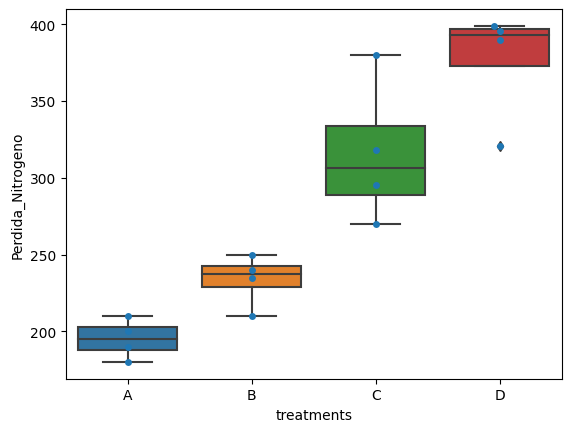

In [50]:
## **1.6 Generemos los boxplot para el desgaste con los diferentes tipos de cuero**
ax = sns.boxplot(x='treatments', y='Perdida_Nitrogeno', data=df_melt)
ax = sns.swarmplot(x="treatments", y="Perdida_Nitrogeno", data=df_melt)
plt.show()

## **1.7 Las funciones _stats f_oneway_ toman los grupos como entrada y devuelven el valor ANOVA F y p - value**

In [51]:
## **1.7 Las funciones _stats f_oneway_ toman los grupos como entrada y devuelven el valor ANOVA F y p - value**
fvalue, pvalue = stats.f_oneway(df['A'], df['B'], df['C'], df['D'])
print(fvalue, pvalue)

26.224157049570824 1.4836325806224052e-05


# **Obtener la tabla ANOVA como R como salida**

## **1.8 Obtener la tabla ANOVA como R como salida - Modelo de mínimos cuadrados ordinarios (OLS)**

In [52]:
## **1.8 Obtener la tabla ANOVA como R como salida - Modelo de mínimos cuadrados ordinarios (OLS)**
model = ols('Perdida_Nitrogeno ~ C(treatments)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,152100.0,1.0,149.919915,3.862468e-08
C(treatments),79816.5,3.0,26.224157,1.483633e-05
Residual,12174.5,12.0,NaN,NaN


## **1.9 *texto en cursiva* Obtener la tabla ANOVA como R como salida - Modelo de mínimos cuadrados ordinarios (OLS)**

In [53]:
## **1.9 *texto en cursiva* Obtener la tabla ANOVA como R como salida - Modelo de mínimos cuadrados ordinarios (OLS)**
res = st()
res.anova_stat(df=df_melt, res_var='Perdida_Nitrogeno', anova_model='Perdida_Nitrogeno ~ C(treatments)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(treatments),3.0,79816.5,26605.500000,26.224157,0.000015
Residual,12.0,12174.5,1014.541667,NaN,NaN


## **1.10 Realizar una comparación múltiple por pares (HSD de Tukey)**

In [54]:
## **1.10 Realizar una comparación múltiple por pares (HSD de Tukey)**
res = st()
res.tukey_hsd(df=df_melt, res_var='Perdida_Nitrogeno', xfac_var='treatments', anova_model='Perdida_Nitrogeno ~ C(treatments)')
res.tukey_summary

/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]
/usr/local/lib/python3.10/dist-packages/bioinfokit/analys.py:421: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to 

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,A,B,38.75,-28.125452,105.625452,2.433138,0.356123
1,A,C,120.75,53.874548,187.625452,7.581972,0.001000
2,A,D,181.50,114.624548,248.375452,11.396505,0.001000
3,B,C,82.00,15.124548,148.875452,5.148834,0.015471
4,B,D,142.75,75.874548,209.625452,8.963367,0.001000
5,C,D,60.75,-6.125452,127.625452,3.814533,0.079619


group1,group2,meandiff,p-adj,lower,upper,reject
A,B,38.75,0.3556,-79.6639,157.1639,False
A,C,120.75,0.0008,2.3361,239.1639,True
A,D,181.5,0.0,63.0861,299.9139,True
B,C,82.0,0.0155,-36.4139,200.4139,False
B,D,142.75,0.0002,24.3361,261.1639,True
C,D,60.75,0.0795,-57.6639,179.1639,False


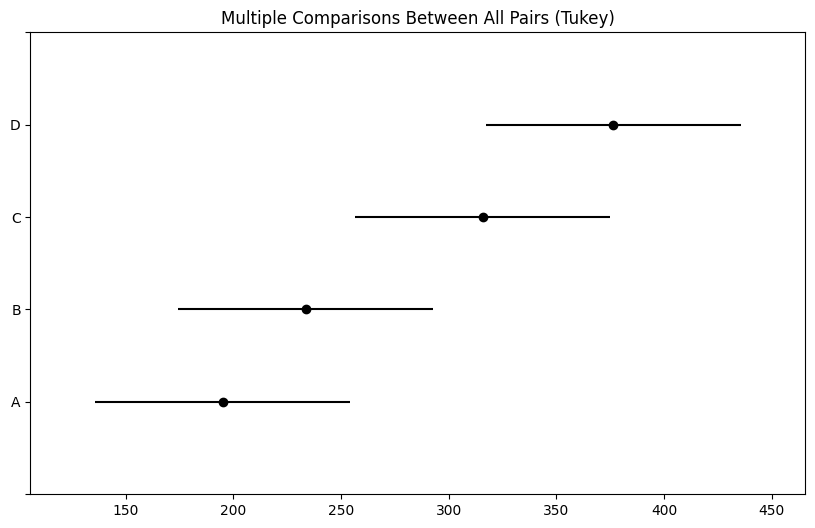

In [55]:
# **Comparaciones Múltiples**
tukey = pairwise_tukeyhsd(endog=df_melt["Perdida_Nitrogeno"],     # Data
                          groups=df_melt["treatments"],   # Groups
                          alpha=0.001)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

# **Pruebe los supuestos de ANOVA**
## **1.12 Normalidad: QQ-plot**

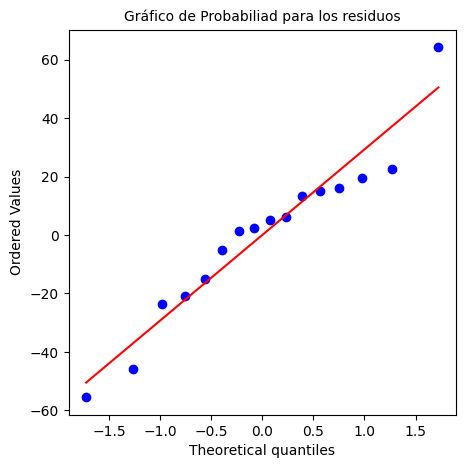

In [56]:

# **Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= False)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

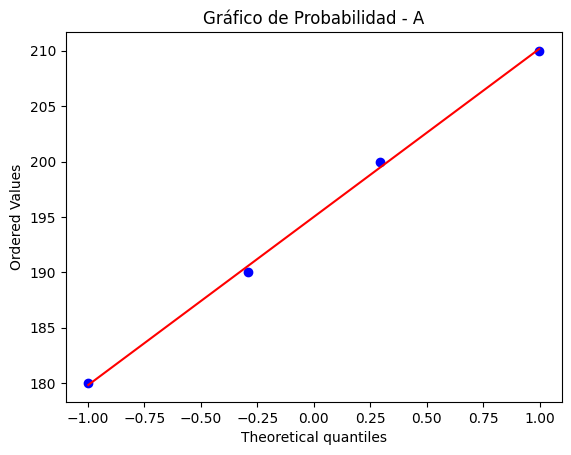

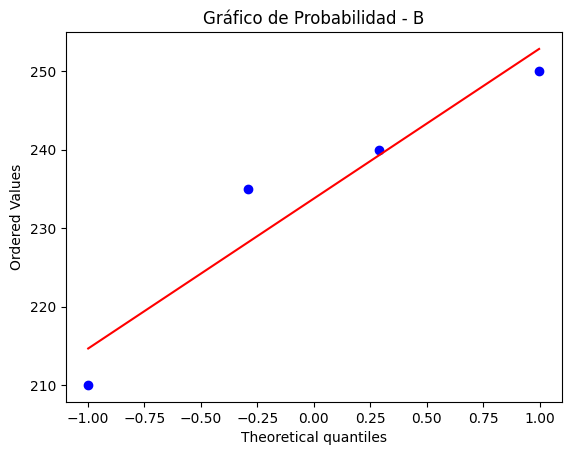

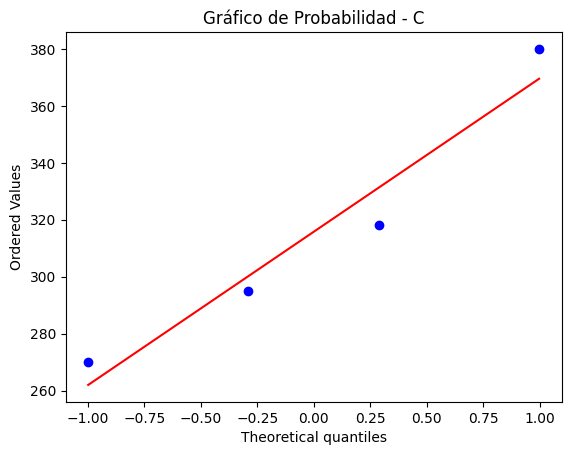

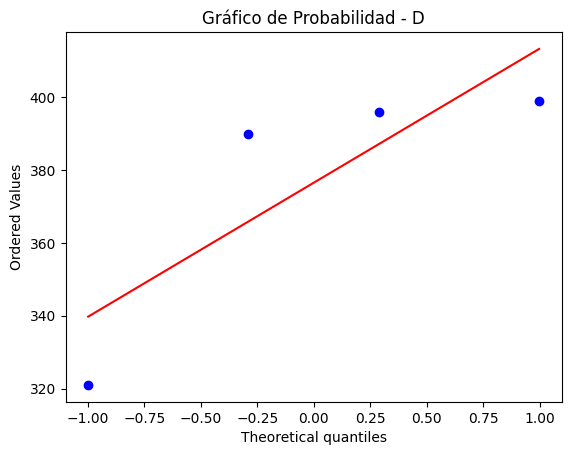

In [57]:
unique_tipo_provedor  = df_melt['treatments'].unique()
for Tipo_provedor in unique_tipo_provedor:
    stats.probplot(df_melt[df_melt['treatments'] == Tipo_provedor]['Perdida_Nitrogeno'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+Tipo_provedor)
    plt.show()


## **1.13 Normalidad:  Histograma**

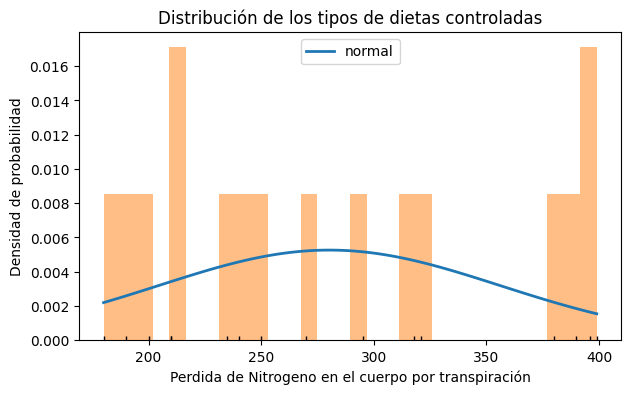

In [58]:
# Histograma + curva normal teórica
# ==============================================================================

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(df_melt['Perdida_Nitrogeno'])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(df_melt['Perdida_Nitrogeno']), max(df_melt['Perdida_Nitrogeno']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=df_melt['Perdida_Nitrogeno'], density=True, bins=30,  alpha=0.5)
ax.plot(df_melt['Perdida_Nitrogeno'], np.full_like(df_melt['Perdida_Nitrogeno'], -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de los tipos de dietas controladas')
ax.set_xlabel('Perdida de Nitrogeno en el cuerpo por transpiración')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [59]:
def sturges(data):
    num_data = len(data)
    num_bins = np.round(np.log2(num_data)) + 1
    return int(num_bins)
def freedman_diaconis(data):
    num_data = len(data)
    irq = np.percentile(data, 75) - np.percentile(data, 25)
    bin_width = 2 * irq / np.power(num_data, 1/3)
    num_bins = np.int((np.max(data) -  np.min(data)) / bin_width)  + 1
    return num_bins

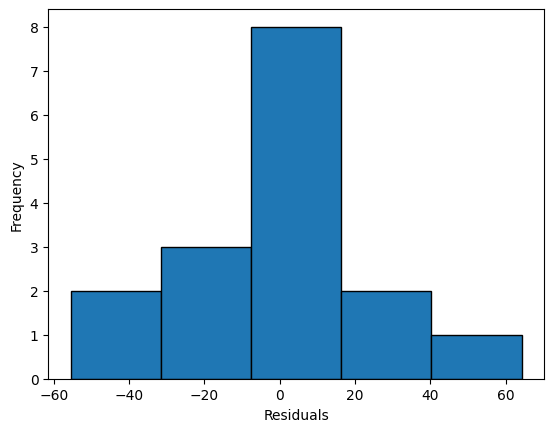

In [60]:
## **1.13 Normalidad:  Histograma**
#plt.hist(res.anova_model_out.resid, bins=sturges(res.anova_model_out.resid), histtype='bar', ec='k')
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

## **1.14 Normalidad - Prueba de Shapiro-Wilk**

In [61]:
#1.14 Normalidad - Prueba de Shapiro-Wilk
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)
print('Cual es el estadistico de Prueba para shapiro-wilk w = ', w)
print('El valor p para el estadistico de Prueba es p_value = ', pvalue)
print('Para que se cumpla el supuesto de normalidad se debe cumplir que el p_value = ', f'{pvalue} > 0.05')

0.9516265392303467 0.5158875584602356
Cual es el estadistico de Prueba para shapiro-wilk w =  0.9516265392303467
El valor p para el estadistico de Prueba es p_value =  0.5158875584602356
Para que se cumpla el supuesto de normalidad se debe cumplir que el p_value =  0.5158875584602356 > 0.05


## **1.15 Homocedasticidad - Prueba de Bartlett**

In [62]:
## **1.15 Homocedasticidad - Prueba de Bartlett**
w, pvalue = stats.bartlett(df['A'], df['B'], df['C'])
print(w, pvalue)

4.939042246494565 0.08462537442434523


## **1.16 Homocedasticidad - Prueba de Bartlett: Otra forma**

In [63]:
## **1.15 Homocedasticidad - Prueba de Bartlett: Otra forma**
res = st()
res.bartlett(df=df_melt, res_var='Perdida_Nitrogeno', xfac_var='treatments')
res.bartlett_summary

,Parameter,Value
0,Test statistics (T),5.1828
1,Degrees of freedom (Df),3.0000
2,p value,0.1589


## **1.17 Homocedasticidad - Prueba de Levene**

In [64]:
## **1.17 Homocedasticidad - Prueba de Levene**
res = st()
res.levene(df=df_melt, res_var='Perdida_Nitrogeno', xfac_var='treatments')
res.levene_summary
# output

,Parameter,Value
0,Test statistics (W),0.8477
1,Degrees of freedom (Df),3.0000
2,p value,0.4940
